In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
    
def isNewData(oldTimestamp):                # you don't need this function
    file = open("output.txt","r")
    data = file.read()
    if data == "":
        return False
    #print(data)
    cells = data.splitlines()[-1].split()
    if cells[0] != "DONE":
        return False
    if int(cells[1]) <= oldTimestamp:
        return False    
    return True

def executeCommand(command):               # you rather don't need this function
    file = open("commands.txt","w")
    file.write(command)
    file.close()
    time.sleep(0.2)
    
def executeCommandAndWaitUntilReady(command):    # you need this function
    file = open("commands.txt","w")
    oldTimestamp = round(time.time() * 1000)
    file.write(command)
    file.close()
    time.sleep(0.1)
    while False==isNewData(oldTimestamp):
        time.sleep(0.1)
    
def getDataOutput():                    # get output of kernel, whatever it is
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    return data.split()

def getDataOutputF():                    # get output of kernel and convert to float 
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    out = []
    for x in data.split():
        if "(" in x:
            x = x.replace("(","")
            x = x.replace(")","")
            r = float(x.split(",")[0])
            i = float(x.split(",")[1])
            out.append(r+1j*i)
        else:
            out.append(float(x))
    return out

def getDataOutputFR():                  # get output of kernel and convert to float (only real part)
    file = open("output.txt","r")
    data = file.read().splitlines()[0]
    file.close()
    out = []
    for x in data.split():
        if "(" in x:
            x = x.replace("(","")
            x = x.replace(")","")
            r = float(x.split(",")[0])
            i = float(x.split(",")[1])
            out.append(r)
        else:
            out.append(float(x))
    return out

In [5]:
executeCommandAndWaitUntilReady("print_memory ;")
print( getDataOutput() )

['Mem:', '364[MB],', 'Mem', 'max:', '364[MB]']


In [6]:
τ=0.1
ts = list(np.arange(0,200+τ/2, τ))
Ovls = {}
Nis={}

In [ ]:
U,Unn="20","-2"
Ovls["U="+U+", Unn="+Unn]=[]
Nis["U="+U+", Unn="+Unn]=[]

executeCommandAndWaitUntilReady("generate_base base 6 4 ;")

executeCommandAndWaitUntilReady("generate_operator_EBHH base H0 -1 "+U+" "+Unn+" 0 0 ;") 
executeCommandAndWaitUntilReady("generate_operator_EBHH base Hev -1 -"+U+" "+Unn+" 0 0 ;") 
executeCommandAndWaitUntilReady("generate_operator_Nis base Nis ;")

executeCommandAndWaitUntilReady("compute_eigenstate_name H0 0 H_GS ;")
executeCommandAndWaitUntilReady("generate_base_eigens b2 Hev ;")

executeCommandAndWaitUntilReady("compute_expected_value Nis H_GS ;")
Nis["U="+U+", Unn="+Unn].append( getDataOutputFR() )

executeCommandAndWaitUntilReady("set_base b2 H_GS ;")
executeCommandAndWaitUntilReady("copy H_GS H_GS_0 ;")



executeCommandAndWaitUntilReady("compute_overlap H_GS H_GS_0 ;")
Ovls["U="+U+", Unn="+Unn].append( getDataOutputFR()[0] )



for t in np.arange(τ,200+τ/2, τ):
    print(t, end=", ")    
    executeCommandAndWaitUntilReady("timeEvolve H_GS "+str(τ)+" ;")
    executeCommandAndWaitUntilReady("set_base base H_GS ;")
    executeCommandAndWaitUntilReady("compute_expected_value Nis H_GS ;")
    Nis["U="+U+", Unn="+Unn].append( getDataOutputFR() )
    executeCommandAndWaitUntilReady("set_base b2 H_GS ;")

    
    executeCommandAndWaitUntilReady("compute_overlap H_GS H_GS_0 ;")
    Ovls["U="+U+", Unn="+Unn].append( getDataOutputF()[0] ) 
    
executeCommandAndWaitUntilReady("clear_workspace ;")

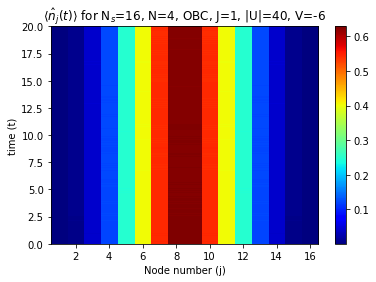

In [66]:
# file = open('Nis_40_-6_16_4_ED.txt',"w")
# t = 0
# ts = list(np.arange(0,20+τ/2, τ))
# for line in Nis["U="+U+", Unn="+Unn]:
#     file.write(str(t)+"\t")
#     t+=τ
#     for n in line:
#         file.write(str(n)+" ")
#     file.write("\n")
# file.close()
    
#print(Nis["U="+U+", Unn="+Unn])
#Fidelities = list(map(list, zip(*Fidelities)))

fig1, ax1 = fig,axs = plt.subplots(1)
plot = ax1.imshow(Nis["U="+U+", Unn="+Unn],interpolation='none',cmap=plt.cm.jet,origin=0,aspect="auto",extent=[0.5,16.5,0,20])  
fig1.colorbar(plot, ax=ax1)
ax1.set_xlabel('Node number (j)')
ax1.set_ylabel('time (t)')
ax1.set_title(r'$\langle \hat{n}_j(t) \rangle$ for N$_s$=16, N=4, OBC, J=1, |U|=40, V=-6')
#plt.savefig("Nis_40_-6_16_4_ED.png")
plt.show()

In [79]:
executeCommandAndWaitUntilReady("quit ;")

In [70]:
print(np.abs(Ovls["U="+"20"+", Unn="+"0"])**2)

KeyError: 'U=20, Unn=0'

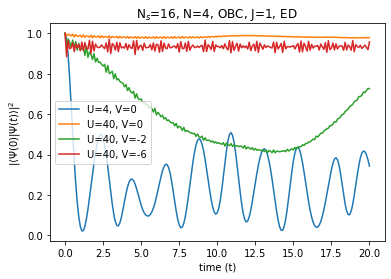

In [82]:
Fid2_0 = np.abs(Ovls["U="+"2"+", Unn="+"0"])**2
Fid20_0 = np.abs(Ovls["U="+"20"+", Unn="+"0"])**2
Fid20_2 = np.abs(Ovls["U="+"20"+", Unn="+"-2"])**2
Fid20_6 = np.abs(Ovls["U="+"20"+", Unn="+"-6"])**2

file = open("Fid_16_4.txt","w")
for i in range(len(ts)):
    file.write(str(ts[i]) +"\t"+str(Fid2_0[i]) +"\t"+str(Fid20_0[i]) +"\t"+str(Fid20_2[i]) +"\t"+str(Fid20_6[i])+"\n")
file.close()

plt.plot(ts, Fid2_0, label="U=4, V=0")
plt.plot(ts, Fid20_0, label="U=40, V=0")
plt.plot(ts, Fid20_2, label="U=40, V=-2")
plt.plot(ts, Fid20_6, label="U=40, V=-6")

plt.xlabel("time (t)")
plt.ylabel(r'$|\langle \Psi(0) | \Psi(t) \rangle|^2$')
plt.legend()
plt.title("N$_s$=16, N=4, OBC, J=1, ED")
plt.savefig("Fid_16_4.png",dpi=100)
plt.show()